### Plots of hydrogen investments

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

CASES = ["base", "cap50", "floatingCap50", "cables50", "opex50"]

DF_BY_CASES = dict({})

for case in CASES:
    _df = pd.read_csv(f'hydrogen/{case}_results_hydrogen_production_investments.csv')
    DF_BY_CASES[case] = _df

DF_BY_CASES

{'base':             Node     Period  New capacity [MW]  Total capacity [MW]  \
 0        Austria  2020-2025       4.637720e-05             0.000046   
 1        Austria  2025-2030       5.084996e-05             0.000097   
 2        Austria  2030-2035       5.547751e-04             0.000652   
 3        Austria  2035-2040       3.447447e-06             0.000655   
 4        Austria  2040-2045       1.520822e-04             0.000761   
 ..           ...        ...                ...                  ...   
 283  EnergyhubEU  2035-2040       2.382233e-05             0.000261   
 284  EnergyhubEU  2040-2045       4.369414e-04             0.000654   
 285  EnergyhubEU  2045-2050       4.019072e-07             0.000623   
 286  EnergyhubEU  2050-2055       1.882059e-04             0.000649   
 287  EnergyhubEU  2055-2060       8.093751e-07             0.000626   
 
      New capacity [kg/h]  Total capacity [kg/h]  \
 0               0.000843               0.000843   
 1               0.000

In [22]:
NO_NODES = ["NO1", "NO2", "NO3", "NO4", "NO5"]
HUB_NODES = ["EnergyhubEU"]

def plot_hydrogen_inv(case, _df):
    df = _df[["Node", "Period", "Total capacity [MW]"]]

    prod_NO_2050 = df[(df["Node"].isin(NO_NODES)) & (df["Period"] == "2055-2060")]["Total capacity [MW]"].sum()
    prod_hub_2050 = df[(df["Node"].isin(HUB_NODES)) & (df["Period"] == "2055-2060")]["Total capacity [MW]"].sum()

    print(f"NO hydrogen invested production capacity in 2050: {round(prod_NO_2050/1000, 2)} GW")
    print(f"Energyhub hydrogen invested production capacity in 2050: {round(prod_hub_2050/1000, 2)} GW")

    periods = list(df["Period"].unique())
    nodes_sorted_by_cap = list(df[df["Period"] == "2055-2060"]\
                              .sort_values(by="Total capacity [MW]", ascending=False)["Node"].values)
    
    nodes_displayed = nodes_sorted_by_cap
    installed_caps = []
    for node in nodes_displayed:
        cap_by_period = []
        for period in periods:
            cap_by_period.append(df[(df["Node"] == node) & (df["Period"] == period)]["Total capacity [MW]"].values[0])

        # Remove nodes that have no capacity (1 MW since some threshold)
        if all(c < 1 for c in cap_by_period):
            nodes_displayed.remove(node)
        else:
            installed_caps.append(cap_by_period)
    
    installed_caps_GW = [[cap/1000 for cap in sublist] for sublist in installed_caps]
    period_displayed_gen = [period.split("-")[0] for period in periods]

    plt.rcParams.update({'font.size': 10})
    plt.rcParams['axes.prop_cycle'] = cycler('color', [*plt.get_cmap('tab20c').colors, *plt.get_cmap('tab20b').colors])
    plt.figure(figsize=(10,6))
    plt.rc('axes', axisbelow=True)
    plt.grid()
    plt.stackplot(period_displayed_gen, installed_caps_GW, labels=nodes_displayed)
    plt.ylabel('Electrolyzer capacity [GWe]')
    plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=6)
    plt.margins(x=0)
    plt.title(f"Electrolyzer invested capacity for case: {case}")
    plt.show()

NO hydrogen invested production capacity in 2050: 8.38 GW
Energyhub hydrogen invested production capacity in 2050: 0.0 GW


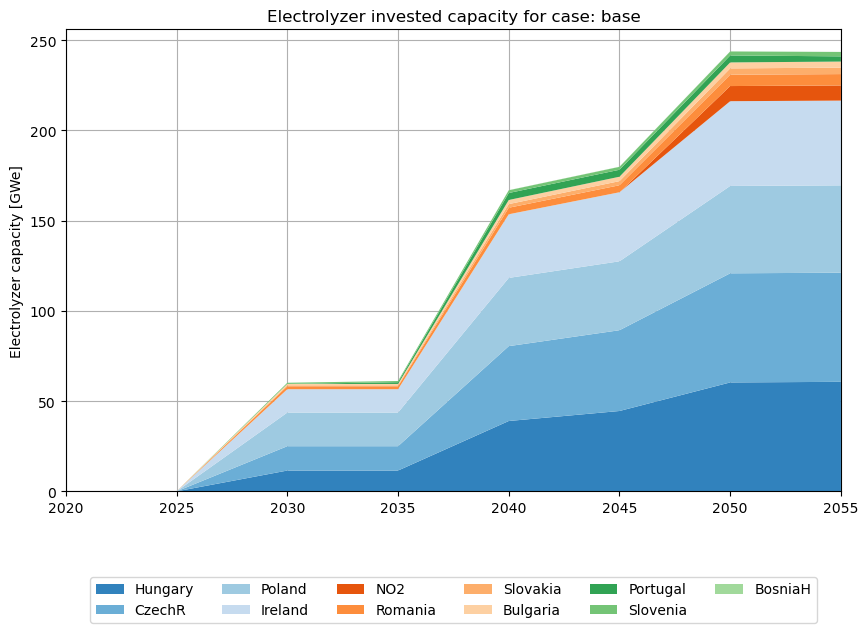

NO hydrogen invested production capacity in 2050: 76.0 GW
Energyhub hydrogen invested production capacity in 2050: 8.87 GW


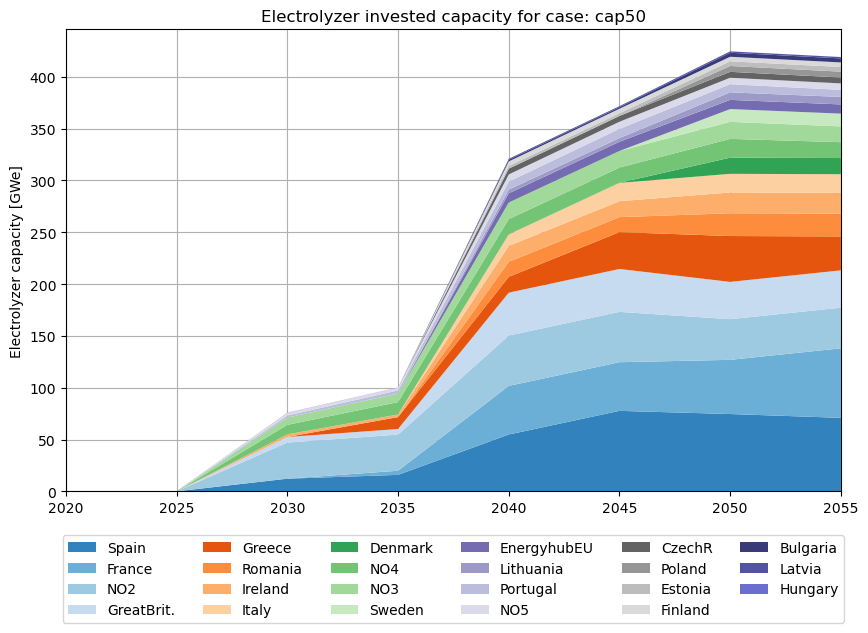

NO hydrogen invested production capacity in 2050: 68.58 GW
Energyhub hydrogen invested production capacity in 2050: 0.01 GW


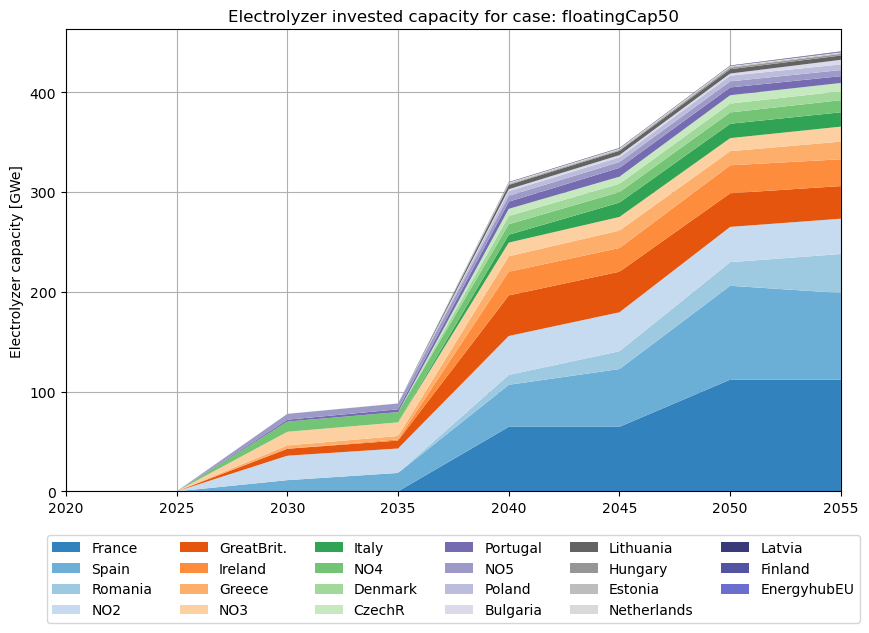

NO hydrogen invested production capacity in 2050: 1.14 GW
Energyhub hydrogen invested production capacity in 2050: 0.0 GW


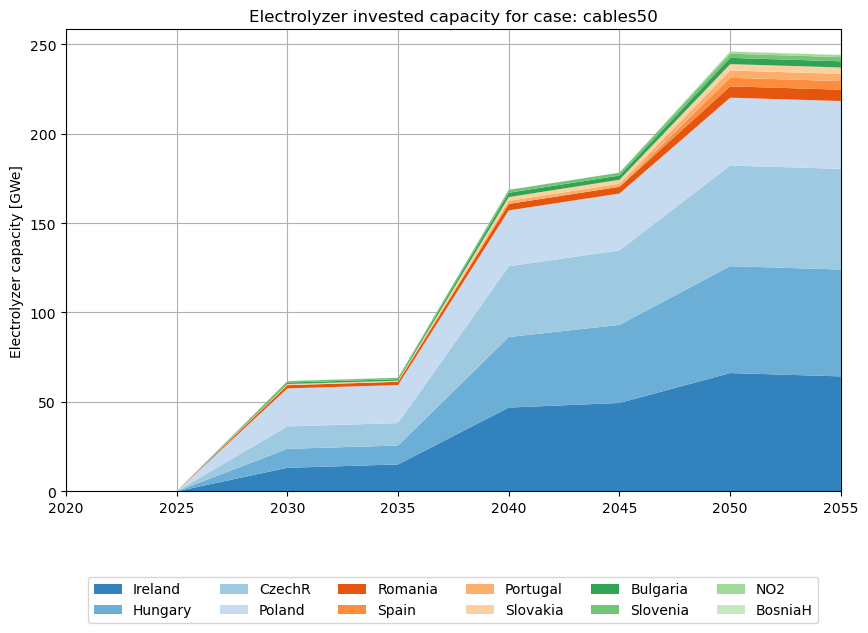

NO hydrogen invested production capacity in 2050: 59.05 GW
Energyhub hydrogen invested production capacity in 2050: 0.91 GW


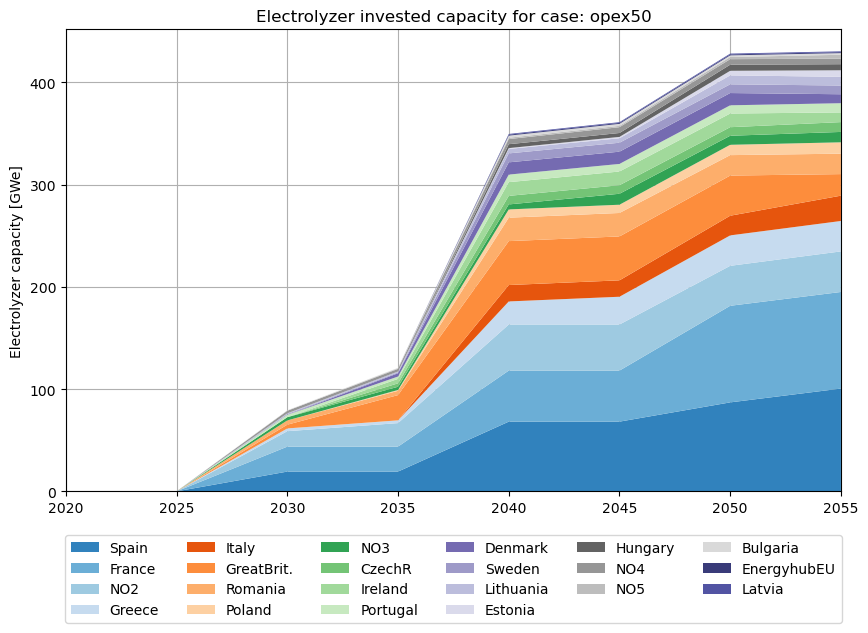

In [23]:
for case, _df in DF_BY_CASES.items():
    plot_hydrogen_inv(case, _df)